In [203]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from numpy import quantile, where
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as msno

In [204]:
dataset = pd.read_csv("sensor.csv")
dataset = dataset.fillna(0)
dataset.head(5)

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [205]:
datatime = dataset["timestamp"]
del dataset["timestamp"]

del dataset["Unnamed: 0"]

In [206]:
dataset

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,0.0000,231.1921,NORMAL
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,0.0000,231.1921,NORMAL
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,0.0000,232.0602,NORMAL
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,0.0000,234.0856,NORMAL


In [207]:
dataset.loc[dataset["machine_status"]== 'NORMAL', 'class'] = '1' #정상
dataset.loc[dataset["machine_status"]== 'RECOVERING', 'class'] = '0' #이상
dataset.loc[dataset["machine_status"]== 'BROCKEN', 'class'] = '0' #이상

In [208]:
del dataset['machine_status']

1 = normal, 0 = abnormal
1    205836
0     14477
Name: class, dtype: int64


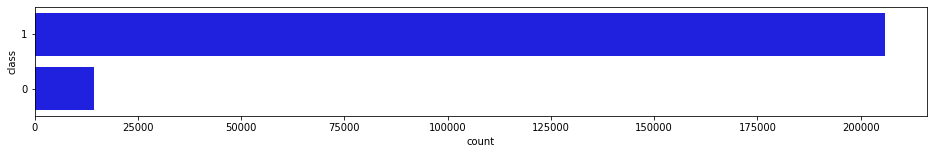

In [209]:
# Plot the balance of class labels
normal = dataset['class']
df_base = dataset.copy()

print('1 = normal, 0 = abnormal')
value_counts = normal.value_counts()
print(value_counts)

plt.figure(figsize=(16,2))
fig = sns.countplot(y=normal, data=dataset, color='b')
plt.show()

In [210]:
train_dataset = dataset['class'].isin(['1'])
train_dataset = dataset.loc[train_dataset]

test_dataset_normal = train_dataset.iloc[191359:]
train_dataset = train_dataset.iloc[:191359]

test_dataset = dataset['class'].isin(['0'])
test_dataset = dataset.loc[test_dataset]

test_dataset = pd.concat([test_dataset_normal, test_dataset])

train_dataset.shape, test_dataset.shape, test_dataset_normal.shape

((191359, 53), (28954, 53), (14477, 53))

In [211]:
y_train = train_dataset["class"]
y_test = test_dataset["class"]

del train_dataset['class']
del test_dataset['class']

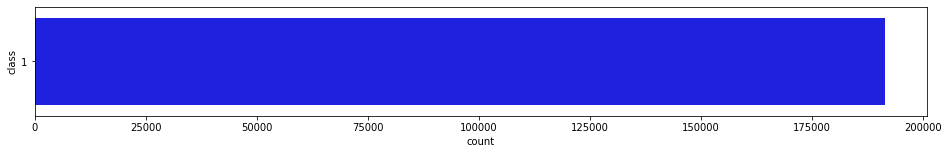

In [315]:
plt.figure(figsize=(16,2))
fig = sns.countplot(y=y_train, data=y_train, color='b')
plt.show()

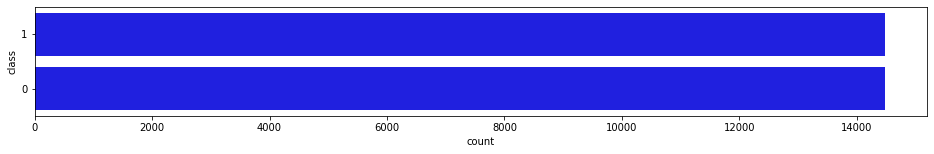

In [316]:
plt.figure(figsize=(16,2))
fig = sns.countplot(y=y_test, data=y_test, color='b')
plt.show()

In [212]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
X_scaled_train  = scaler.fit_transform(train_dataset)
X_scaled_test  = scaler.fit_transform(test_dataset)

In [213]:
from sklearn.mixture import GaussianMixture

In [298]:
GMM = GaussianMixture(n_components=3, random_state=100)

In [299]:
GMM.fit(train_dataset)

GaussianMixture(n_components=3, random_state=100)

In [300]:
anomaly_score_GMM_train = GMM.score_samples(train_dataset)
anomaly_score_GMM_train

array([-169.54575073, -169.54575073, -167.71177414, ..., -173.27241603,
       -173.32228642, -168.15023299])

In [301]:
anomaly_score_GMM_sorted = sorted(anomaly_score_GMM_train)

In [302]:
anomaly_score_GMM_test = GMM.score_samples(test_dataset)
anomaly_score_GMM_test.shape

(28954,)

In [303]:
error = np.array(anomaly_score_GMM_sorted)     
error = error.reshape(-1,1)

error_test=np.array(anomaly_score_GMM_test)
error_test = error_test.reshape(-1,1)

In [304]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
scaled_error  = scaler.fit_transform(error)
scaled_error_test  = scaler.fit_transform(error_test)

In [305]:
thresh_GMM = np.percentile(scaled_error, 90)

In [306]:
# classifier
df_test = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > thresh_GMM:
            df_test.append('0')
        else:
            df_test.append('1')

In [307]:
novelty_classifier(scaled_error_test)

In [308]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset

    df_pred_test = pd.DataFrame(X_test, columns=['Pred'])
    x_pred = df_pred_test['Pred'] 
    
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Abnormal [1]'], 
                yticklabels=['Normal [0]', 'Abnormal [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(X_test, y_true))
    
    model_score = score(X_test, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       1.00      0.50      0.67     28903

    accuracy                           0.50     28954
   macro avg       0.50      0.25      0.33     28954
weighted avg       0.99      0.50      0.66     28954

f1_score: 33.25%


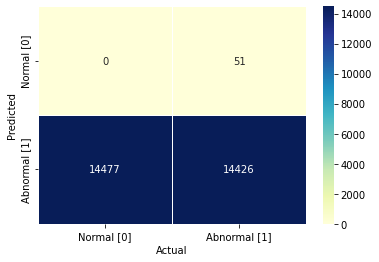

In [309]:
map_labels = True 
model_score = measure_performance(GMM, df_test, y_test, map_labels)
performance_df = pd.DataFrame().append({'model_name':GMM, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)